## Analyzing Lending Case Study

In [1]:
# Importing required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 125)

## to supress the scientific notation
pd.options.display.float_format = '{:.4f}'.format

# 1. Reading the data from csv

In [2]:
application_file_location='loan.csv'
app_df= pd.read_csv(application_file_location)
app_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,NaN,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,NaN,1,INDIVIDUAL,N

# 2. Understanding the structure of the data

In [214]:
app_df.shape

(39717, 111)

In [215]:
app_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [82]:
app_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,14035.0000,2786.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39661.0000,0.0000,39717.0000,0.0000,0.0000,0.0000,39717.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39661.0000,39717.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,39020.0000,39678.0000,0.0000,0.0000,0.0000,0.0000
mean,683131.9131,850463.5594,11219.4438,10947.7132,10397.4489,324.5619,68968.9264,13.3151,0.1465,0.8692,35.9010,69.6981,9.2944,0.0551,13382.5281,22.0888,51.2279,50.9898,12153.5965,11567.1491,9793.3488,2263.6632,1.3630,95.2216,12.4061,2678.8262,0.0000,NaN,1.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0433,0.0000,NaN,NaN,NaN,NaN
std,210694.1329,265678.3074,7456.6707,7187.2387,7128.4504,208.8749,63793.7658,6.6786,0.4918,1.0702,22.0201,43.8225,4.4003,0.2372,15885.0166,11.4017,375.1728,373.8245,9042.0408,8942.6726,7065.5221,2608.1120,7.2900,688.7448,148.6716,4447.1360,0.0000,NaN,0.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2043,0.0000,NaN,NaN,NaN,NaN
min,54734.0000,70699.0000,500.0000,500.0000,0.0000,15.6900,4000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
25%,516221.0000,666780.0000,5500.0000,5400.0000,5000.0000,167.0200,40404.0000,8.1700,0.0000,0.0000,18.0000,22.0000,6.0000,0.0000,3703.0000,13.0000,0.0000,0.0000,5576.9300,5112.3100,4600.0000,662.1800,0.0000,0.0000,0.0000,218.6800,0.0000,NaN,1.0000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [57]:
def plot_pie_chart(plotting_frame, x_col_name, y_col_name):
    
    labels = plotting_frame[x_col_name].tolist()
    values = plotting_frame[y_col_name].tolist()
    
    trace= go.Pie(labels = labels, values= values)
    py.offline.iplot([trace])

# 3. Data Quality and Check Missing Values

### 3.1 Percentage of missing values for rows and column

In [5]:
cols = pd.DataFrame(app_df.isnull().mean().round(4)*100, columns=['percentage_of_missing_values']).sort_values(by=['percentage_of_missing_values'], ascending=False)
print(cols)

                                percentage_of_missing_values
verification_status_joint                           100.0000
annual_inc_joint                                    100.0000
mo_sin_old_rev_tl_op                                100.0000
mo_sin_old_il_acct                                  100.0000
bc_util                                             100.0000
bc_open_to_buy                                      100.0000
avg_cur_bal                                         100.0000
acc_open_past_24mths                                100.0000
inq_last_12m                                        100.0000
total_cu_tl                                         100.0000
inq_fi                                              100.0000
total_rev_hi_lim                                    100.0000
all_util                                            100.0000
max_bal_bc                                          100.0000
open_rv_24m                                         100.0000
open_rv_12m             

In [6]:
## Summary of missing values for columns
print(str(round(100.0*cols[cols['percentage_of_missing_values']==0].count()/len(cols),2))+"% "+ "columns have no missing value")
print(str(round(100.0*cols[(cols['percentage_of_missing_values']>0)&(cols['percentage_of_missing_values']<=10)].count()/len(cols),2))+"% "+ "columns having missing value between 0-10 %")
print(str(round(100.0*cols[(cols['percentage_of_missing_values']>10)&(cols['percentage_of_missing_values']<=50)].count()/len(cols),2))+"% "+ "columns having missing value between 10-50 %")
print(str(round(100.0*cols[cols['percentage_of_missing_values']>50].count()/len(cols),2))+"% "+ "columns having missing value greater than 50 %")


percentage_of_missing_values   38.7400
dtype: float64% columns have no missing value
percentage_of_missing_values   9.0100
dtype: float64% columns having missing value between 0-10 %
percentage_of_missing_values   0.9000
dtype: float64% columns having missing value between 10-50 %
percentage_of_missing_values   51.3500
dtype: float64% columns having missing value greater than 50 %


In [7]:
row_null = pd.DataFrame(app_df.isnull().sum(axis=1), columns=['row_missing_values'])
print(row_null)

       row_missing_values
0                      58
1                      57
2                      59
3                      56
4                      55
...                   ...
39712                  59
39713                  59
39714                  61
39715                  61
39716                  59

[39717 rows x 1 columns]


### 3.2 Removing the column with the high percentage of missing value (>40%)

In [5]:
app_df_reshaped = app_df.drop(app_df.columns[app_df.apply(lambda col: (col.isnull().sum()/len(app_df)*100)>40) ], axis=1)
print(app_df_reshaped.columns)                                   
                                             

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [9]:
app_df_reshaped.shape

(39717, 54)

In [10]:
app_df_reshaped.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39717.0000,39661.0000,39717.0000,39717.0000,39661.0000,39717.0000,39020.0000,39678.0000
mean,683131.9131,850463.5594,11219.4438,10947.7132,10397.4489,324.5619,68968.9264,13.3151,0.1465,0.8692,9.2944,0.0551,13382.5281,22.0888,51.2279,50.9898,12153.5965,11567.1491,9793.3488,2263.6632,1.3630,95.2216,12.4061,2678.8262,0.0000,1.0000,0.0000,0.0000,0.0000,0.0433,0.0000
std,210694.1329,265678.3074,7456.6707,7187.2387,7128.4504,208.8749,63793.7658,6.6786,0.4918,1.0702,4.4003,0.2372,15885.0166,11.4017,375.1728,373.8245,9042.0408,8942.6726,7065.5221,2608.1120,7.2900,688.7448,148.6716,4447.1360,0.0000,0.0000,0.0000,0.0000,0.0000,0.2043,0.0000
min,54734.0000,70699.0000,500.0000,500.0000,0.0000,15.6900,4000.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,516221.0000,666780.0000,5500.0000,5400.0000,5000.0000,167.0200,40404.0000,8.1700,0.0000,0.0000,6.0000,0.0000,3703.0000,13.0000,0.0000,0.0000,5576.9300,5112.3100,4600.0000,662.1800,0.0000,0.0000,0.0000,218.6800,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,665665.0000,850812.0000,10000.0000,9600.0000,8975.0000,280.2200,59000.0000,13.4000,0.0000,1.0000,9.0000,0.0000,8850.0000,20.0000,0.0000,0.0000,9899.6403,9287.1500,8000.0000,1348.9100,0.0000,0.0000,0.0000,546.1400,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,837755.0000,1047339.0000,15000.0000,15000.0000,14400.0000,430.7800,82300.0000,18.6000,0.0000,1.0000,12.0000,0.0000,17058.0000,29.0000,0.0000,0.0000,16534.4330,15798.8100,13653.2600,2833.4000,0.0000,0.0000,0.0000,3293.1600,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1077501.0000,1314167.0000,35000.0000,35000.0000,35000.0000,1305.1900,6000000.0000,29.9900,11.0000,8.0000,44.0000,4.0000,149588.0000,90.0000,6311.4700,6307.3700,58563.6799,58563.6800,35000.0200,23563.6800,180.2000,29623.3500,7002.1900,36115.2000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0000


### 3.3 Droping columns which are having only 1 value as it won't add any value to our analysis

In [11]:
uniq_val = app_df.nunique()
drop_cols_having_1_val= uniq_val[uniq_val.values==1].index.tolist()
app_df_reshaped.drop(drop_cols_having_1_val, axis=1, inplace=True)
print("Shape after dropping columns having only 1 unique value: ", app_df_reshaped.shape)


Shape after dropping columns having only 1 unique value:  (39717, 45)


# 4. Column description analysis

### 4.1 Remove unwanted columns which will not add any value to the analysis

In [12]:
app_df_reshaped= app_df_reshaped.drop(columns=['id', 'member_id', "url", "desc", "zip_code"])

print("Shape after dropping unwanted columns : ", app_df_reshaped.shape)

Shape after dropping unwanted columns :  (39717, 40)


In [13]:
app_df_reshaped.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000


### 4.2. Analyse rows for missing values

In [14]:
row_null = pd.DataFrame(app_df_reshaped.isnull().sum(axis=1), columns=['row_missing_values'])
print(row_null)

       row_missing_values
0                       1
1                       0
2                       1
3                       0
4                       0
...                   ...
39712                   1
39713                   1
39714                   2
39715                   2
39716                   1

[39717 rows x 1 columns]


In [15]:
app_df_reshaped.dropna(thresh=45)
app_df_reshaped.shape
app_df_reshaped.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# 5. Check column data types and correct to required type

### 5.1 Convert columns to numeric

In [20]:
app_data_type_df = app_df_reshaped.dtypes
app_data_float_df = app_df_reshaped.select_dtypes(include=['float64'])
app_data_int_df = app_df_reshaped.select_dtypes(include=['int64'])

In [21]:
app_data_float_df_group = app_data_float_df.groupby(app_df_reshaped.isnull().sum()/len(app_df_reshaped)*100).count().reset_index()
#app_data_float_df = pd.DataFrame(app_df_reshaped.isnull().mean().round(2)*100, columns=['percentage_of_missing_values'])
app_data_float_df

,funded_amnt_inv,installment,annual_inc,dti,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,4975.0000,162.8700,24000.0000,27.6500,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,171.6200,0.0000
1,2500.0000,59.8300,30000.0000,1.0000,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,119.6600,0.0000
2,2400.0000,84.3300,12252.0000,8.7200,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,649.9100,0.0000
3,10000.0000,339.3100,49200.0000,20.0000,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,357.4800,0.0000
4,3000.0000,67.7900,80000.0000,17.9400,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,67.7900,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,1075.0000,78.4200,110000.0000,11.3300,0.0000,0.0000,2822.9693,1213.8800,2500.0000,322.9700,0.0000,0.0000,0.0000,80.9000,NaN
39713,875.0000,275.3800,18000.0000,6.4000,0.0000,0.0000,9913.4918,1020.5100,8500.0000,1413.4900,0.0000,0.0000,0.0000,281.9400,NaN
39714,1325.0000,156.8400,100000.0000,2.3000,0.0000,0.0000,5272.1611,1397.1200,5000.0000,272.1600,0.0000,0.0000,0.0000,0.0000,NaN
39715,650.0000,155.3800,200000.0000,3.7200,0.0000,0.0000,5174.1986,672.6600,5000.0000,174.2000,0.0000,0.0000,0.0000,0.0000,NaN


In [23]:
app_data_int_df_group = app_data_int_df.groupby(app_df_reshaped.isnull().sum()/len(app_df_reshaped)*100).count().reset_index()
app_data_int_df

,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,5000,5000,0,1,3,0,13648,9
1,2500,2500,0,5,3,0,1687,4
2,2400,2400,0,2,2,0,2956,10
3,10000,10000,0,1,10,0,5598,37
4,3000,3000,0,0,15,0,27783,38
...,...,...,...,...,...,...,...,...
39712,2500,2500,0,0,13,0,7274,40
39713,8500,8500,1,1,6,0,8847,9
39714,5000,5000,0,0,11,0,9698,20
39715,5000,5000,0,0,17,0,85607,26


### 5.2. Replacing NAN with correct values

In [9]:
cols_to_be_cleaned= app_df_reshaped
uv_df=app_df_reshaped
cols_to_be_cleaned.columns[cols_to_be_cleaned.isnull().any()].tolist()


['emp_title',
 'emp_length',
 'desc',
 'title',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths',
 'pub_rec_bankruptcies',
 'tax_liens']

In [59]:
# Removing columns whihc will not contribute much towards analysis 
app_df_reshaped.drop("emp_title", axis=1, inplace=True)

In [232]:
app_df_reshaped.shape

(39717, 39)

<Axes: xlabel='revol_bal'>

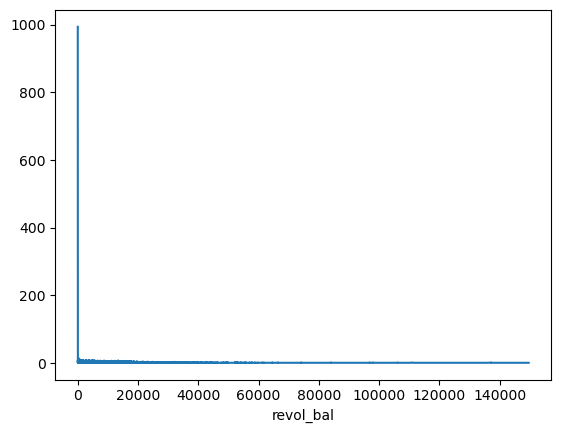

In [61]:
app_df_reshaped['revol_bal'].value_counts().sort_index().plot.line()



In [63]:
app_df_reshaped.describe(include = ["object"])

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d,issue_month,issue_year
count,39717,39717,39717,38642,39717,39717,39717,39717,39717,39706,39717,39717,39667,39646,39715,39717,39717
unique,2,7,35,11,5,3,55,3,14,19615,50,526,1089,101,106,12,5
top,36 months,B,B3,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,CA,Nov-98,0%,May-16,May-16,Dec,2011
freq,29096,12020,2917,8879,18899,16921,2260,32950,18641,2184,7099,370,977,1256,10308,4433,21656


<Axes: >

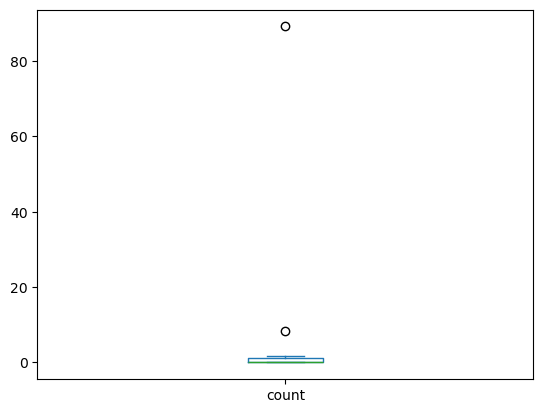

In [65]:
((app_df_reshaped['delinq_2yrs'].value_counts()/app_df_reshaped['delinq_2yrs'].value_counts().sum()) *100).sort_index().plot.box()


<Axes: xlabel='inq_last_6mths'>

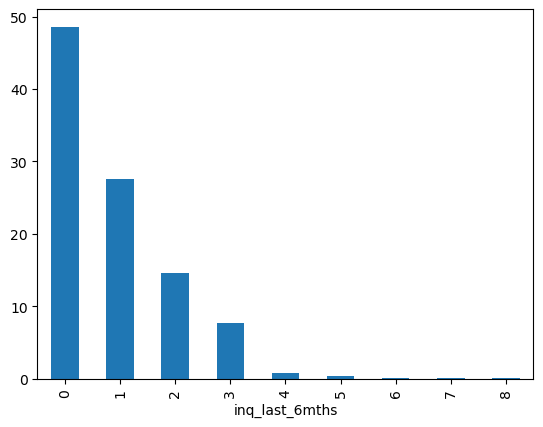

In [70]:
#(app_df_reshaped['delinq_amnt'].value_counts()/app_df_reshaped['delinq_amnt'].value_counts().sum()) *100
#(app_df_reshaped['acc_now_delinq'].value_counts()/app_df_reshaped['acc_now_delinq'].value_counts().sum()) *100
((app_df_reshaped['inq_last_6mths'].value_counts()/app_df_reshaped['inq_last_6mths'].value_counts().sum()) *100).plot.bar()


<Axes: ylabel='Frequency'>

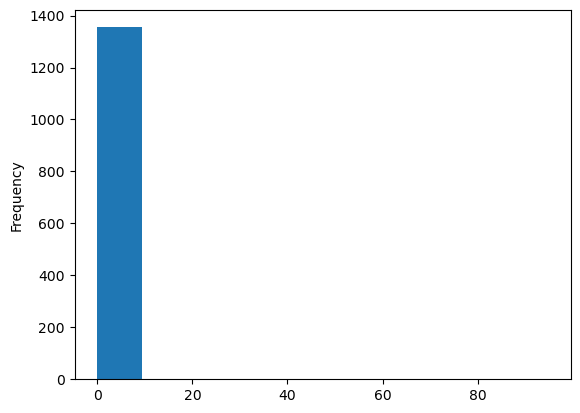

In [72]:
((app_df_reshaped['total_rec_late_fee'].value_counts()/app_df_reshaped['total_rec_late_fee'].value_counts().sum()) *100).plot.hist()


In [ ]:
average_loan_amount = app_df_reshaped.groupby('loan_status')['loan_amnt'].mean()
print(average_loan_amount)
# Create the bar chart
plt.figure(figsize=(8, 6))
average_loan_amount.plot(kind='bar', color=['red','blue','green'])
plt.title('Avg loan amount by loan status')
plt.xlabel('loan status')
plt.ylabel('loan amount')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

<Axes: xlabel='emp_title'>

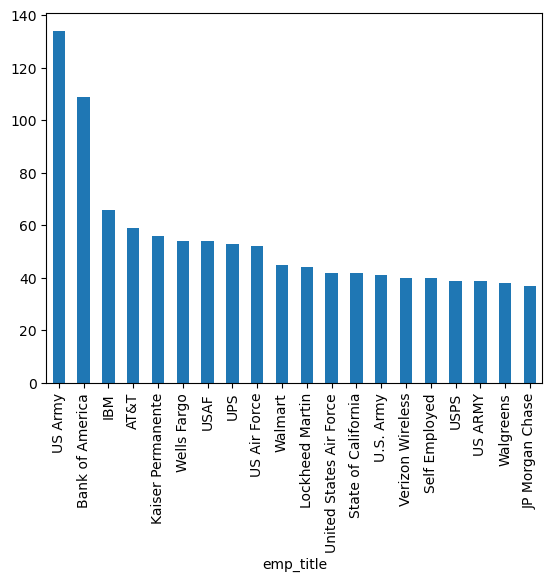

In [3]:
#print(app_df['pymnt_plan'].head())

#app_df['pymnt_plan'].value_counts().plot.box()

app_df['emp_title'].value_counts().head(20).plot.bar()



In [ ]:
correlation_matrix = app_df_reshaped.corr()
plt.figure(figsize=(100, 40))
print(correlation_matrix)


In [20]:

#app_df_reshaped['term']=app_df_reshaped['term'].str.replace('months','')
#uv_df['int_rate']=uv_df['int_rate'].str.replace('%','')
#uv_df=uv_df.drop(columns=['grade'])
#uv_df=uv_df.drop(columns=['sub_grade'])
uv_df=uv_df.drop(columns=['emp_title'])


In [ ]:
app_df_reshaped['emp_title'].value_counts().plot.bar()

<Axes: >

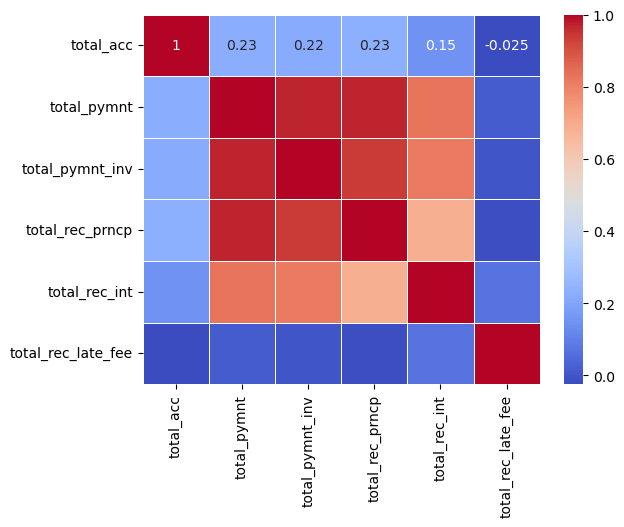

In [80]:
total_df=app_df_reshaped[['total_acc',
       'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee']]
correlation_matrix_total = total_df.corr()
total_df.head()
sns.heatmap(correlation_matrix_total,annot=True, cmap='coolwarm', linewidths=0.5)

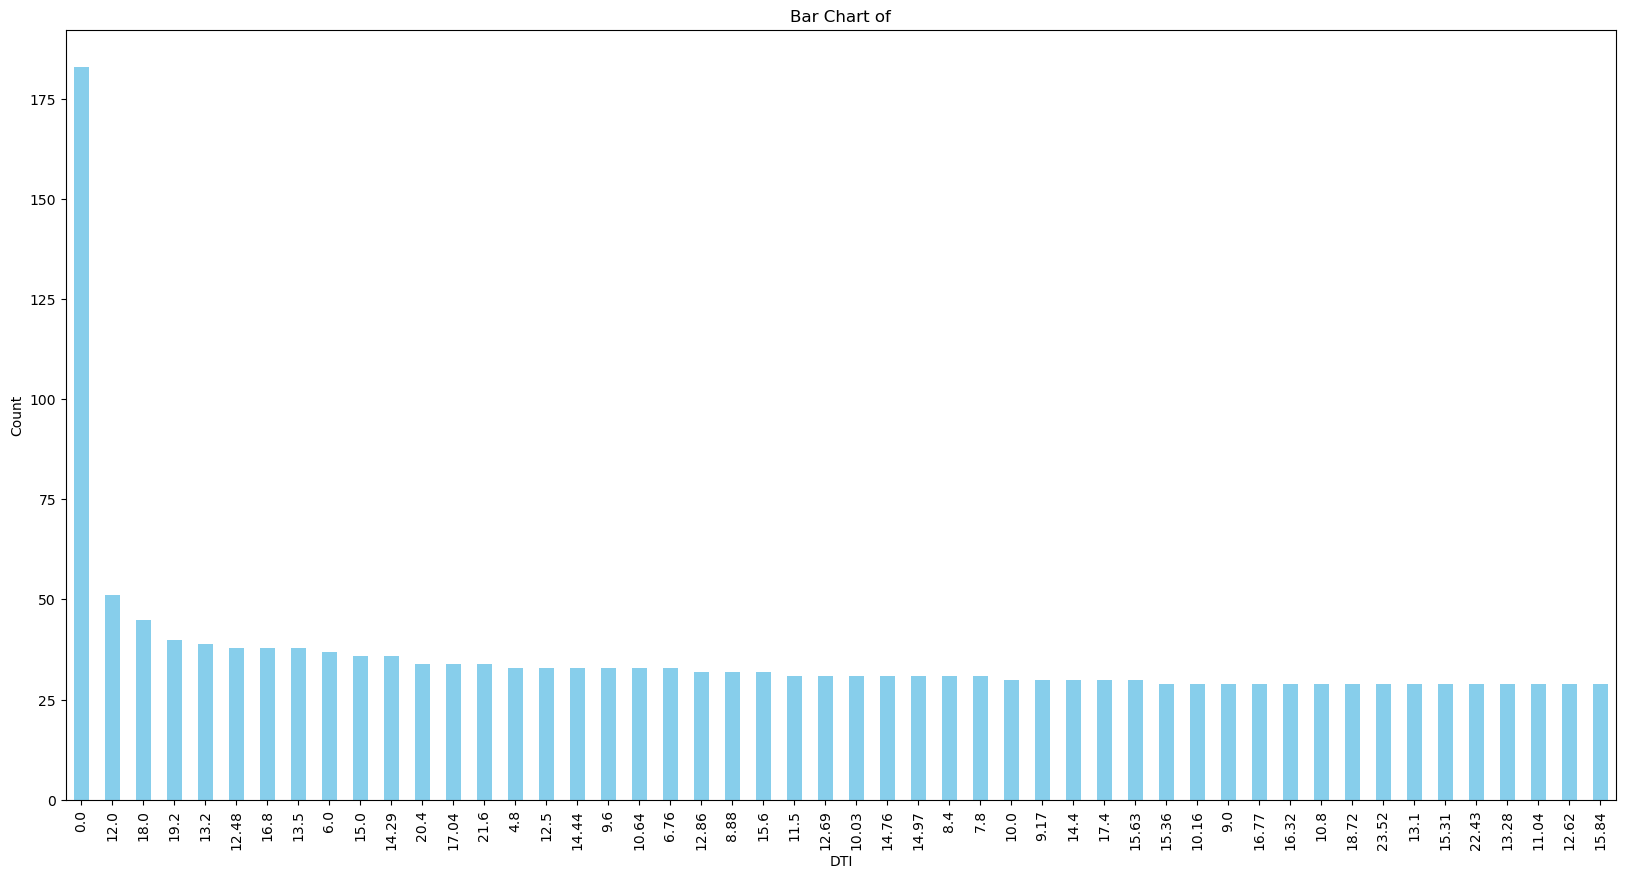

In [81]:
    plt.figure(figsize=(20, 10))

    value_counts = app_df_reshaped['dti'].value_counts().head(50)
    
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of' )
    plt.xlabel('DTI')
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.show()

In [18]:
app_df_reshaped_temp = app_df_reshaped.filter(cols_to_be_cleaned)
app_df_reshaped_temp.columns

Index([], dtype='object')

In [234]:
print(app_df_reshaped["emp_length"].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [235]:
app_df_reshaped["emp_length"].fillna('Self Employed', inplace=True)
print(app_df_reshaped["emp_length"].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' 'Self Employed']


In [31]:
app_df_reshaped["frequency"]= app_df_reshaped["loan_amnt"] - app_df_reshaped["loan_amnt"]
len(app_df_reshaped["frequency"].astype(int))

39717

### 5.4 Converting column into float data type

In [24]:
print(app_df_reshaped["int_rate"].head())
app_df_reshaped["int_rate"] = app_df_reshaped["int_rate"].apply(lambda x : x.rstrip("%")).astype(float)
app_df_reshaped.head(2)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0000,36,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000
1,1077430,1314167,2500,2500,2500.0000,60,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000,1,INDIVIDUAL,0,0.0000,0,0.0000,0.0000


# 6. Derived Metrics

### 6.1 Derive Month, Year from Issue Date

In [43]:
def validate_year(date):
    tmp = date.split('-')[1]
    l = len(tmp)
    if l == 2:
        tmp = "20"+tmp
    else :
        tmp = "200"+tmp
    
    return tmp

app_df_reshaped['issue_month'] = app_df_reshaped['issue_d'].apply(lambda date:date.split('-')[0])
app_df_reshaped['issue_year'] = app_df_reshaped['issue_d'].apply(validate_year)
app_df_reshaped[['issue_d', 'issue_month', 'issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,2011
1,Dec-11,Dec,2011
2,Dec-11,Dec,2011
3,Dec-11,Dec,2011
4,Dec-11,Dec,2011


### 6.2 Derive Loan amount and Annual Income ratio

In [33]:
app_df_reshaped['loan_amt_inc_ratio'] = app_df_reshaped['loan_amnt']/app_df_reshaped['annual_inc']
app_df_reshaped[['loan_amt_inc_ratio', 'loan_amnt', 'annual_inc']].head()

,loan_amt_inc_ratio,loan_amnt,annual_inc
0,0.2083,5000,24000.0000
1,0.0833,2500,30000.0000
2,0.1959,2400,12252.0000
3,0.2033,10000,49200.0000
4,0.0375,3000,80000.0000


In [25]:
app_df_reshaped["loan_amnt"].describe()

count   39717.0000
mean    11219.4438
std      7456.6707
min       500.0000
25%      5500.0000
50%     10000.0000
75%     15000.0000
max     35000.0000
Name: loan_amnt, dtype: float64

# 7. Bivariate/Multivariate Analysis

### 7.1 Finding correlation between amount fields

In [34]:
app_df_reshaped.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'frequency', 'issue_month', 'issue_year',
       'loan_amt_inc_ratio'],
      dtype='object')

In [44]:
## Finding columns which are correlated

corr_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti',
           'out_prncp', 'out_prncp_inv', 'loan_amt_inc_ratio']

loan_corr = app_df_reshaped.filter(corr_cols)
loan_corr


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,out_prncp,out_prncp_inv,loan_amt_inc_ratio
0,5000,5000,4975.0000,10.6500,162.8700,24000.0000,27.6500,0.0000,0.0000,0.2083
1,2500,2500,2500.0000,15.2700,59.8300,30000.0000,1.0000,0.0000,0.0000,0.0833
2,2400,2400,2400.0000,15.9600,84.3300,12252.0000,8.7200,0.0000,0.0000,0.1959
3,10000,10000,10000.0000,13.4900,339.3100,49200.0000,20.0000,0.0000,0.0000,0.2033
4,3000,3000,3000.0000,12.6900,67.7900,80000.0000,17.9400,524.0600,524.0600,0.0375
...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0000,8.0700,78.4200,110000.0000,11.3300,0.0000,0.0000,0.0227
39713,8500,8500,875.0000,10.2800,275.3800,18000.0000,6.4000,0.0000,0.0000,0.4722
39714,5000,5000,1325.0000,8.0700,156.8400,100000.0000,2.3000,0.0000,0.0000,0.0500
39715,5000,5000,650.0000,7.4300,155.3800,200000.0000,3.7200,0.0000,0.0000,0.0250


In [45]:
corr = loan_corr.corr(method ='pearson')
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,out_prncp,out_prncp_inv,loan_amt_inc_ratio
loan_amnt,1.0000,0.9816,0.9400,0.3094,0.9303,0.2711,0.0664,0.1929,0.1926,0.6059
funded_amnt,0.9816,1.0000,0.9584,0.3126,0.9562,0.2670,0.0663,0.1949,0.1947,0.5943
funded_amnt_inv,0.9400,0.9584,1.0000,0.3067,0.9050,0.2544,0.0747,0.2037,0.2037,0.5659
int_rate,0.3094,0.3126,0.3067,1.0000,0.2827,0.0532,0.1112,0.1346,0.1347,0.2123
installment,0.9303,0.9562,0.9050,0.2827,1.0000,0.2709,0.0542,0.1251,0.1249,0.5444
annual_inc,0.2711,0.2670,0.2544,0.0532,0.2709,1.0000,-0.1227,0.0336,0.0335,-0.2345
dti,0.0664,0.0663,0.0747,0.1112,0.0542,-0.1227,1.0000,0.0361,0.0360,0.1492
out_prncp,0.1929,0.1949,0.2037,0.1346,0.1251,0.0336,0.0361,1.0000,0.9998,0.1270
out_prncp_inv,0.1926,0.1947,0.2037,0.1347,0.1249,0.0335,0.0360,0.9998,1.0000,0.1270
loan_amt_inc_ratio,0.6059,0.5943,0.5659,0.2123,0.5444,-0.2345,0.1492,0.1270,0.1270,1.0000


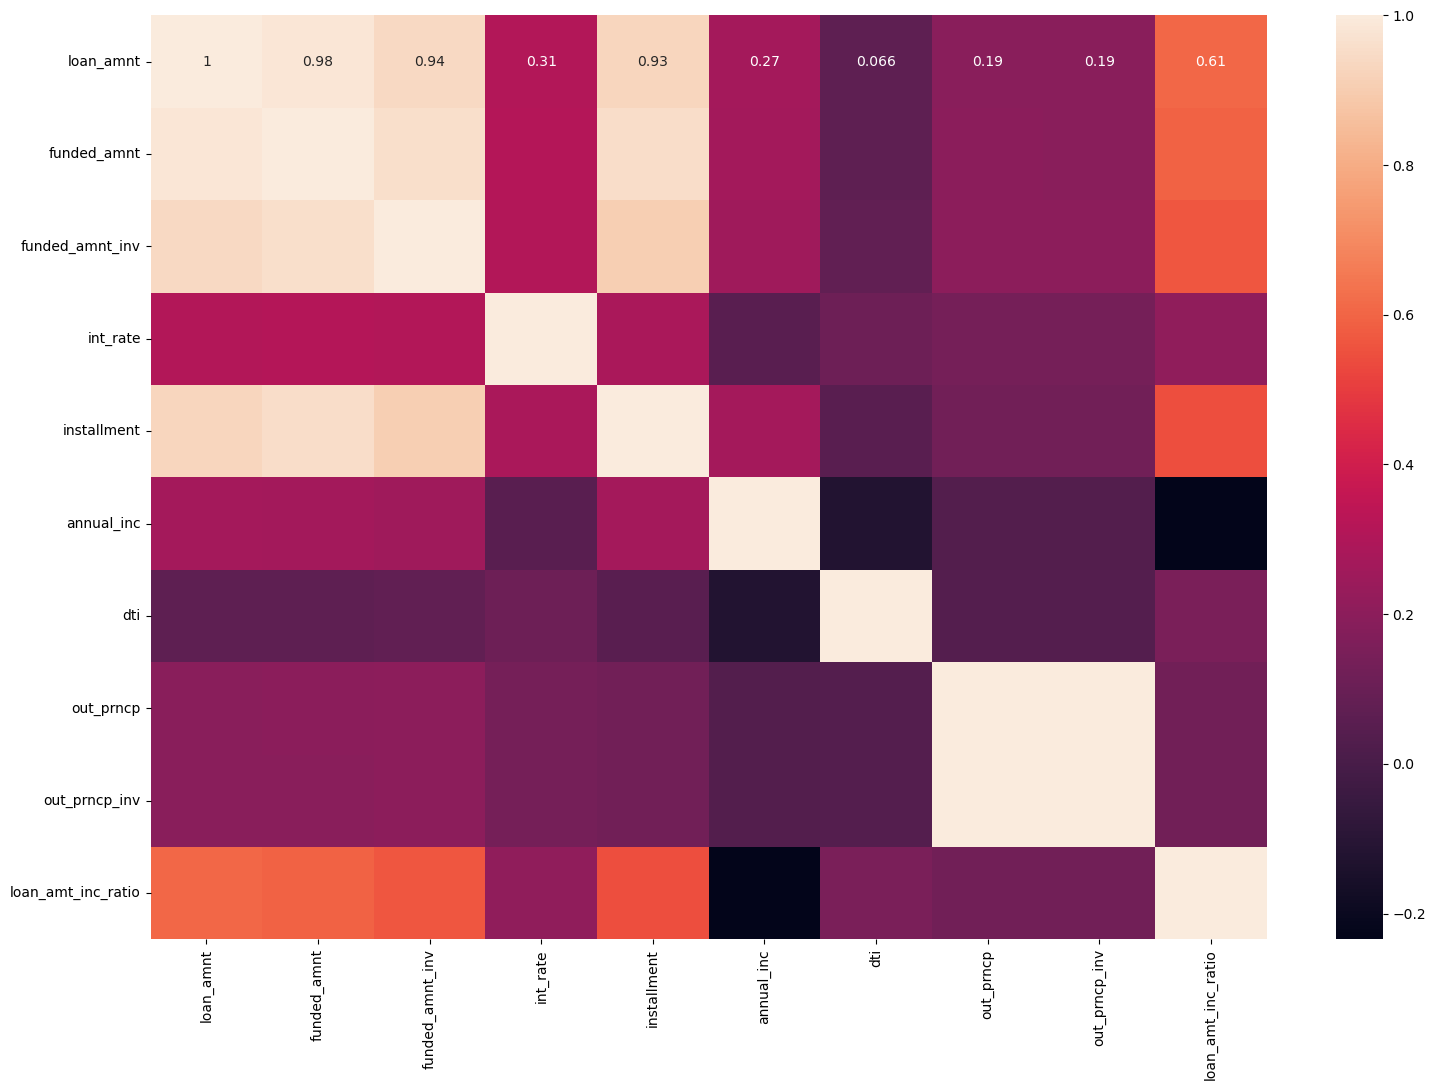

In [46]:
plt.subplots(figsize=(18, 12))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot=True)
plt.show()

#### Inference from the above graph plot: 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv' are tightly correlated.

### 7.2 Analyse the purpose of loan to find the motive between loan and the amount with respect to each loan status

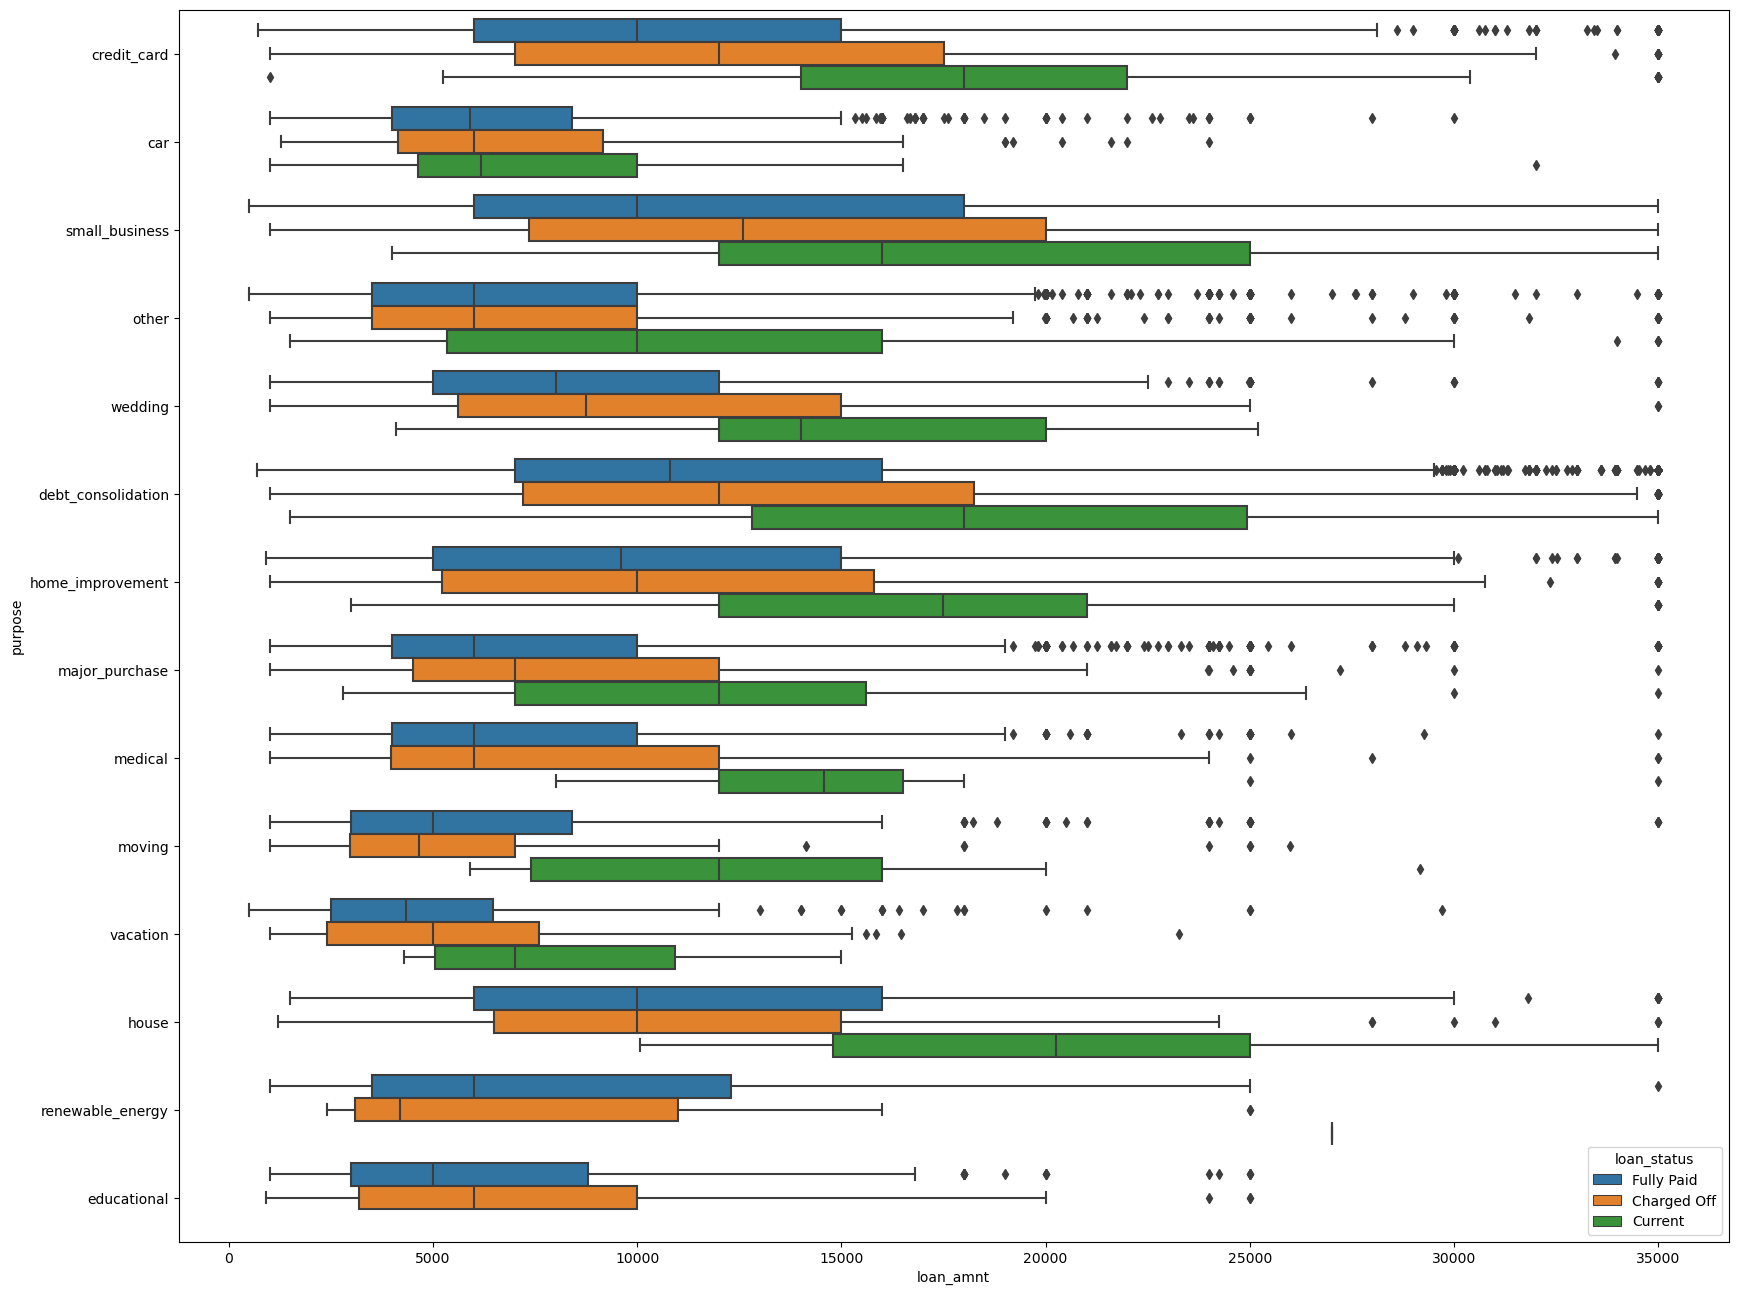

In [47]:
plt.figure(figsize=(20, 16))
sns.boxplot( data = app_df_reshaped, x='loan_amnt', y='purpose', hue='loan_status')
plt.show()

#### Interfernce from the boxplot : purpose having 'other' and 'major purchase' type are having lot of outliers in charge off which will result in more loss to the bank. 'Small business' purpose type also needs an attention. So overall, 'other', 'major purchase' and 'small business' types needs to be considered while lending loan to the customers.

### 7.3 Find relationship between loan status and and year of service to see how its impacting defaulting

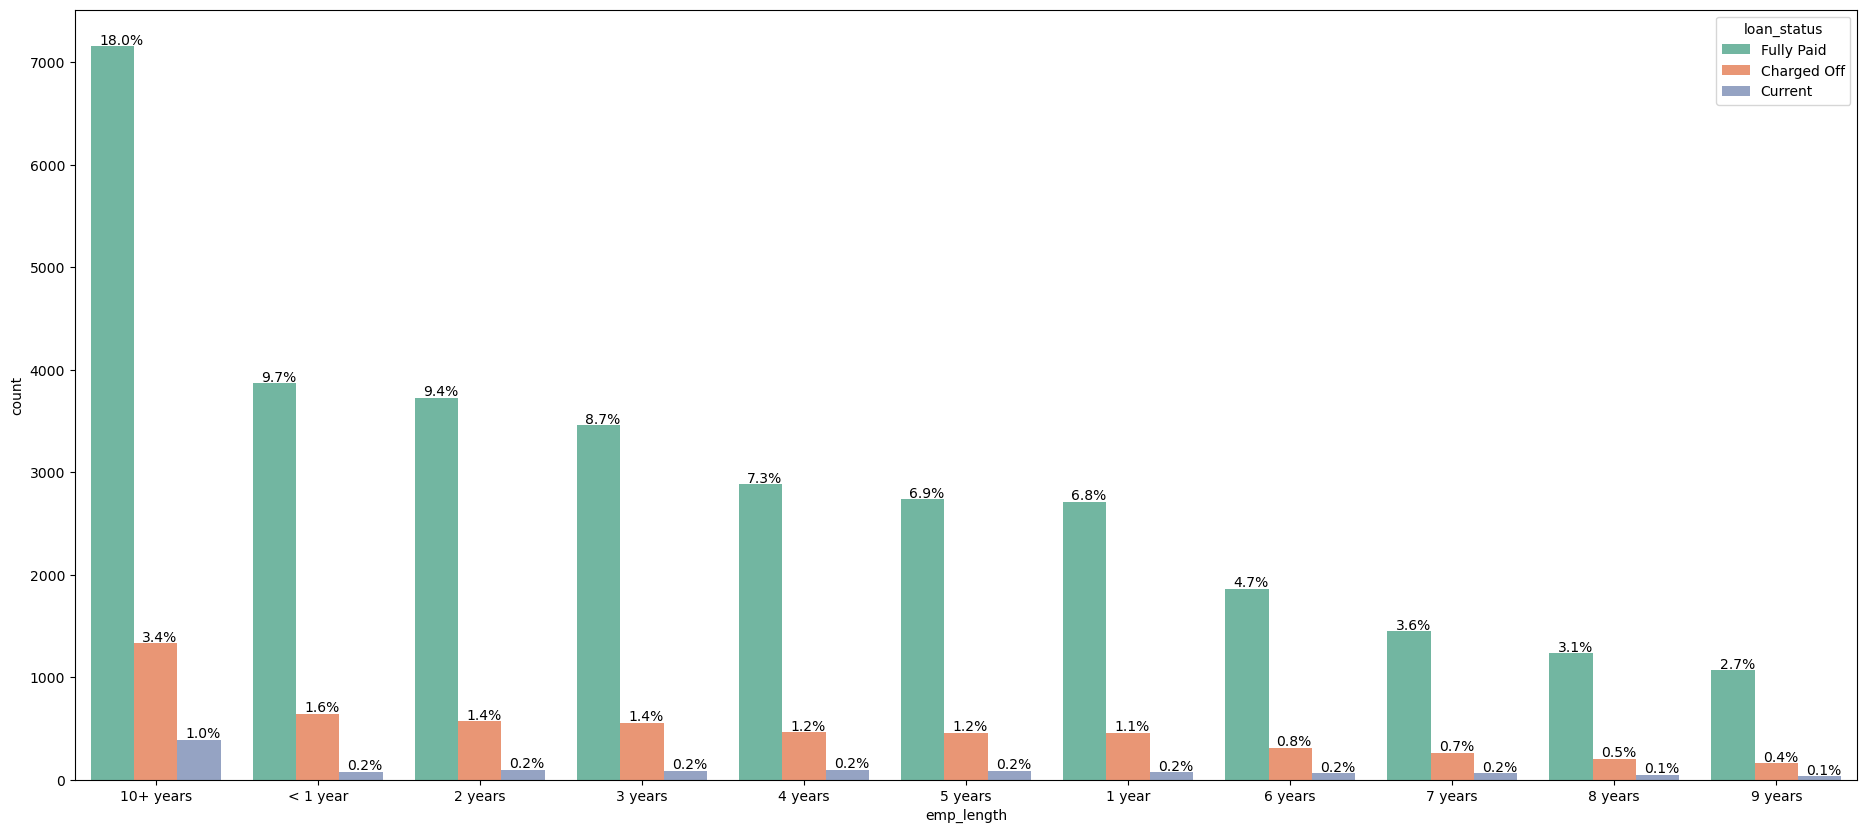

In [48]:
loan_plot = app_df_reshaped[["emp_length", "loan_status"]]
hue_col= pd.Series(data = "loan_status")
fig,ax = plt.subplots()
width = len(loan_plot["emp_length"].unique()) +6 + 5*len(hue_col.unique())
fig.set_size_inches(width, 10)
ax = sns.countplot (data= loan_plot, x= "emp_length", order = loan_plot["emp_length"].value_counts().index, 
                   hue="loan_status", palette = "Set2")

for p in ax.patches:
    tmp_ht= p.get_height()
    
    if math.isnan(tmp_ht):
        tmp_ht = 0.01
        
        
    ax.annotate ('{:1.1f}%'.format((tmp_ht*100)/float(len(loan_plot))), (p.get_x()+0.05, tmp_ht+20))
    

plt.show()
    

#### Inference: Maximum loan is taken by 10+ years employees, approximately 18%.

### 7.3 Deriving relationship between employee's years of experience and purpose of loan

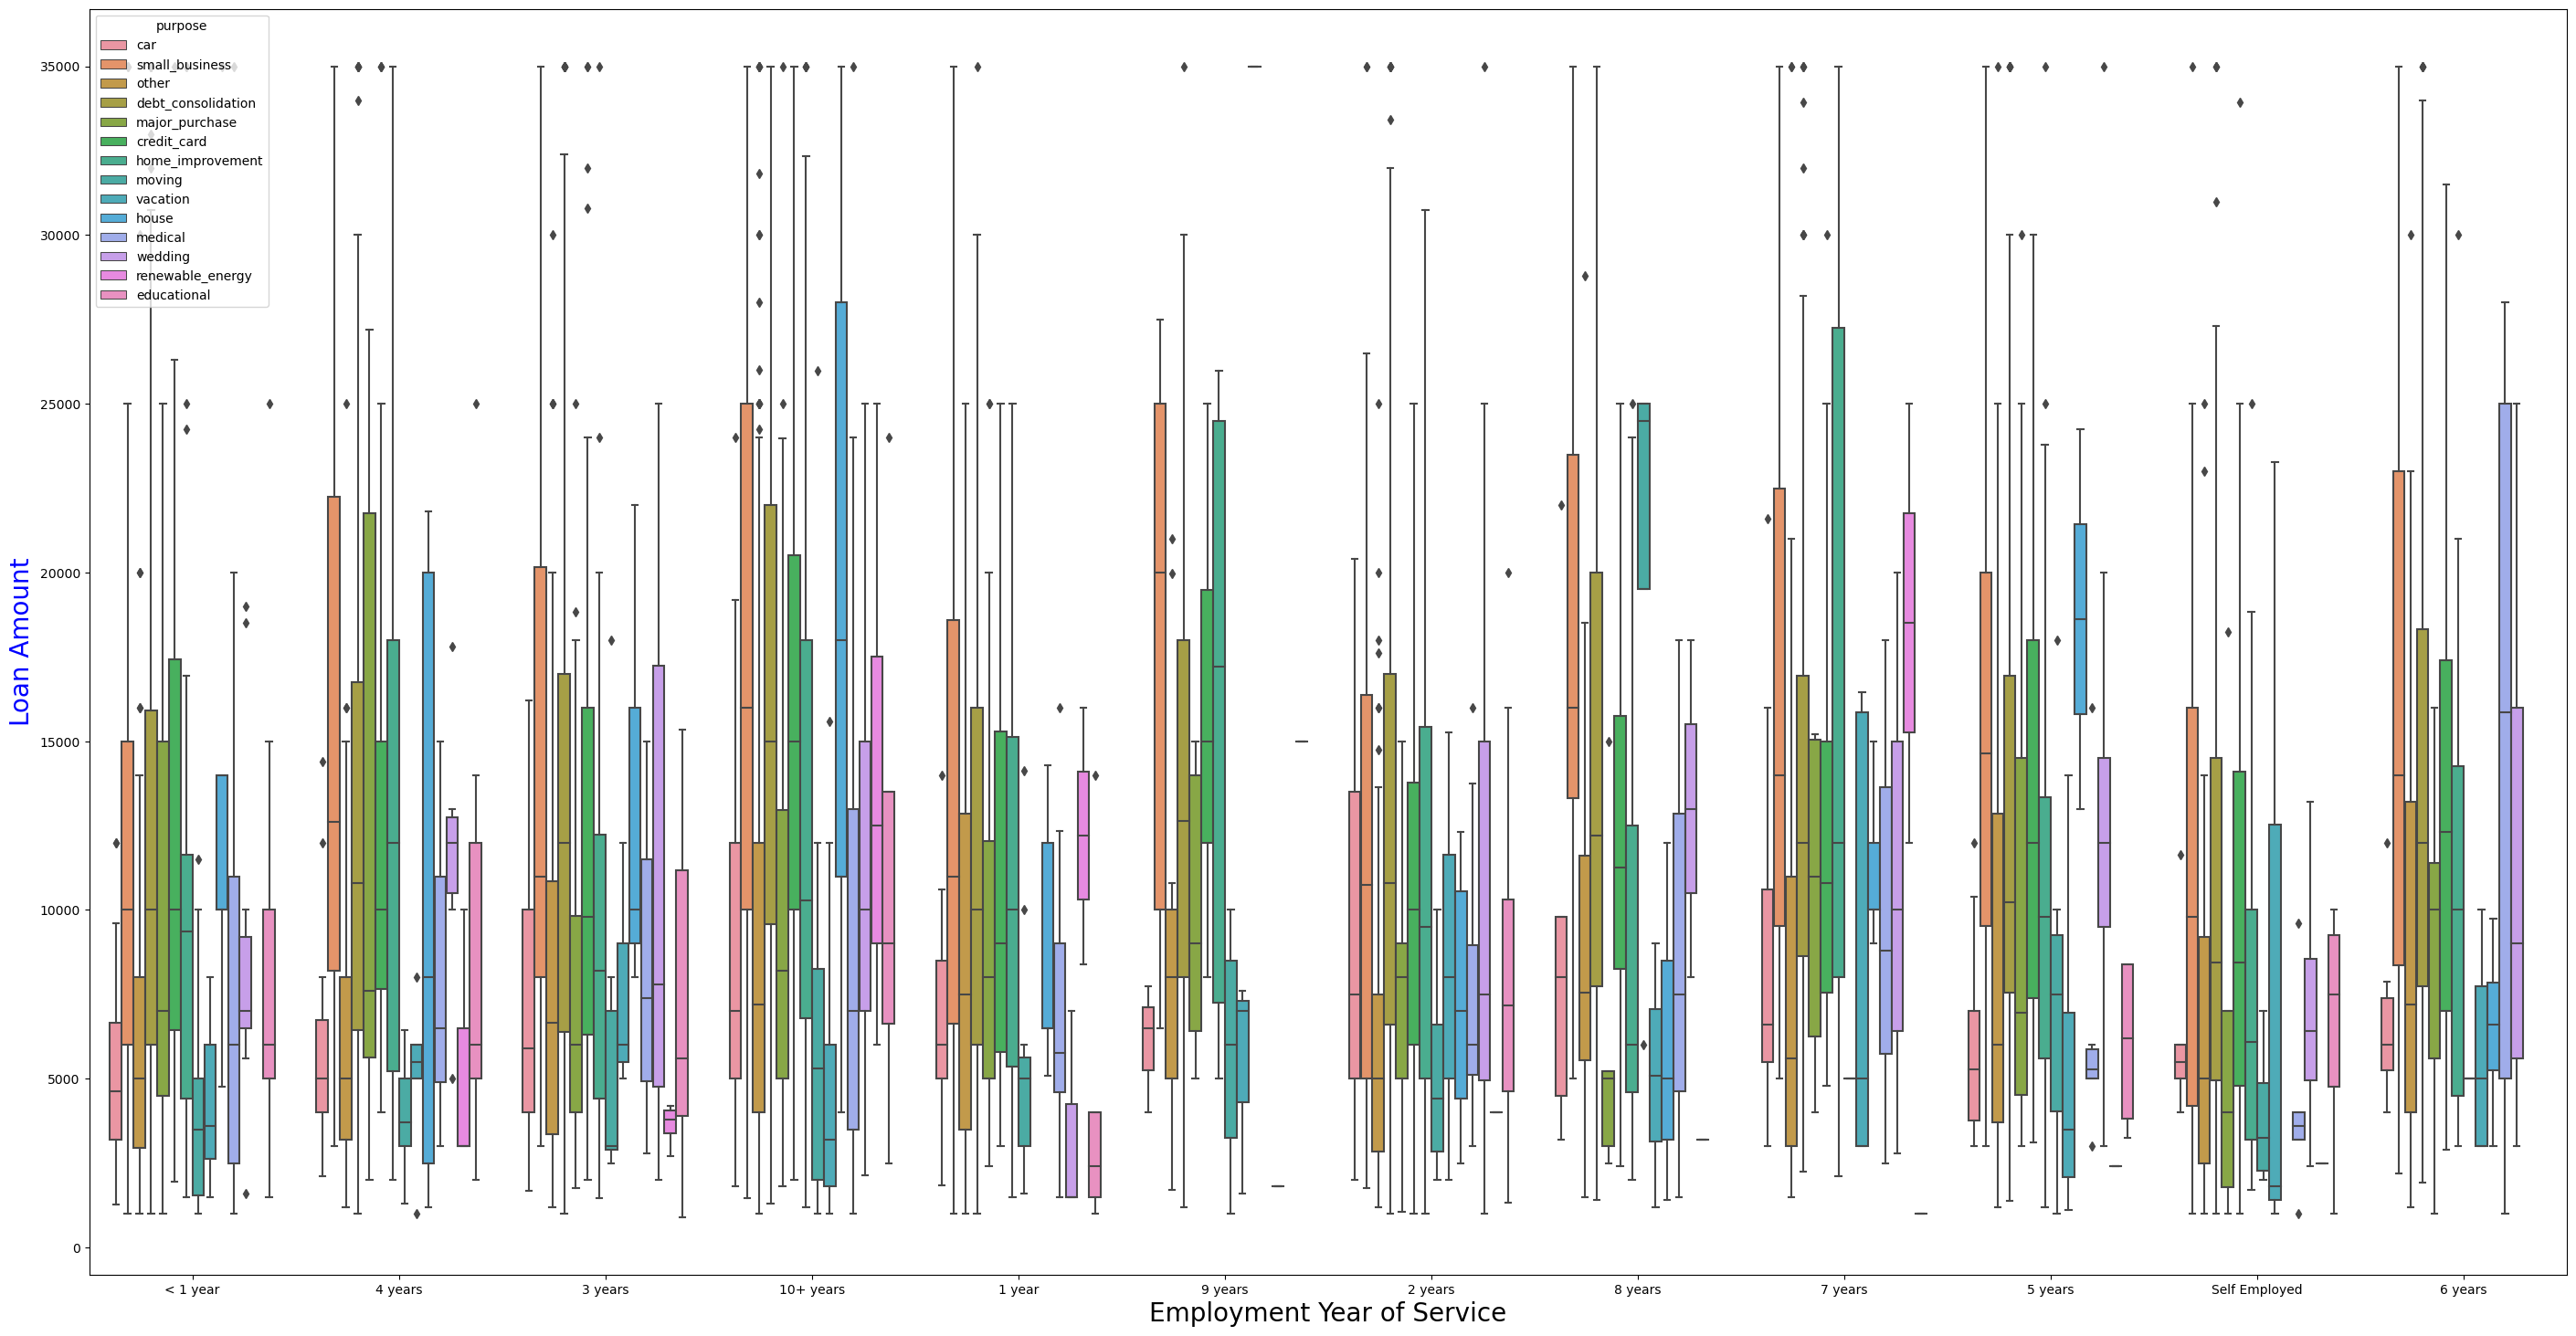

In [261]:
loan_status= app_df_reshaped.pivot_table(index=['loan_status', 'purpose', 'emp_length'], values = 'loan_amnt',
                                        aggfunc=('count')).reset_index()
loan_status = app_df_reshaped.loc[app_df_reshaped['loan_status']== 'Charged Off']

ax = plt.figure(figsize =(35,18))
ax= sns.boxplot(x= 'emp_length', y='loan_amnt', hue='purpose', data=loan_status)
ax.set_xlabel('Employment Year of Service', fontsize=20)
ax.set_ylabel('Loan Amount', color ='b', fontsize=20)

plt.show()

#### Inference: Employees with 10+ years of experience have taken loan in 'small business' , 'other, 'car', credit card' categories.

### 7.4 Finding out factors for loan defaulters -> Derived variables

#### 7.4.1 Function to calculate defaulter %

In [51]:
def cal_defaulter_per( df, col):
    def_tab= pd.crosstab(df[col], df['loan_status'], margins=True)
    def_tab['All'] = def_tab['Charged Off'] + def_tab['Current'] +  def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']), 3) 
    def_tab = def_tab[0:-1]
    return def_tab

#### 7.4.2 Func to plot graph between bivariate and derived variables

In [50]:
def plt_bar_line_chart(df, col, stacked= False):
    plot = cal_defaulter_per(df, col)
    display(plot)
    
    lineplot = plot[['Loan Default Probability']]
    line = lineplot.plot(figsize=(20,8), marker='o', color='r', lw=2)
    line.set_xlabel(df[col].name.title(), fontsize=6)
    line.set_xlabel('Loan Default Probability', color='r', fontsize=6)
    
    barplot= plot.iloc[:, 0:3]
    bar= barplot.plot(kind='bar', ax=line, secondary_y=True, stacked= stacked)
    bar.set_ylabel('Number of Applicantns', color='r', fontsize=20)
    
    plt.show()

#### 7.4.3 Derving defaulter probability for employment year of service 

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
emp_length,,,,,
1 year,456,71,2713,3240,0.1410
10+ years,1331,391,7157,8879,0.1500
2 years,567,97,3724,4388,0.1290
3 years,555,83,3457,4095,0.1360
4 years,462,94,2880,3436,0.1340
5 years,458,88,2736,3282,0.1400
6 years,307,61,1861,2229,0.1380
7 years,263,62,1448,1773,0.1480
8 years,203,44,1232,1479,0.1370


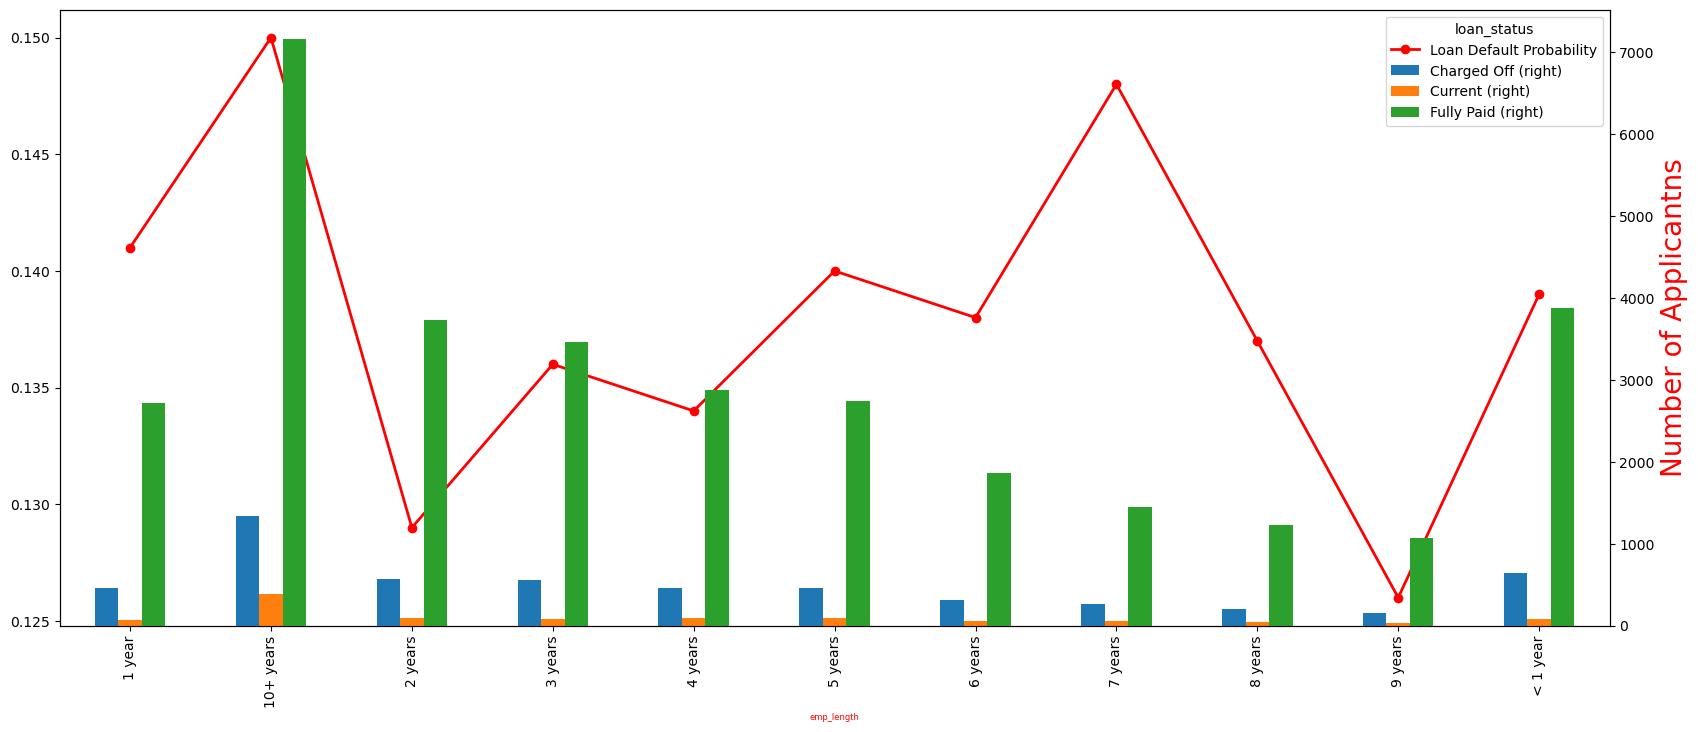

In [52]:
plt_bar_line_chart(app_df_reshaped, "emp_length")

#### Inference : Applicants who are Self Employed and having less than 1 year of experience are more likely to be Defaulter

### Analyse defaulter probability for grades and sub-grades

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
grade,,,,,
A,602,40,9443,10085,0.0600
B,1425,345,10250,12020,0.1190
C,1347,264,6487,8098,0.1660
D,1118,222,3967,5307,0.2110
E,715,179,1948,2842,0.2520
F,319,73,657,1049,0.3040
G,101,17,198,316,0.3200


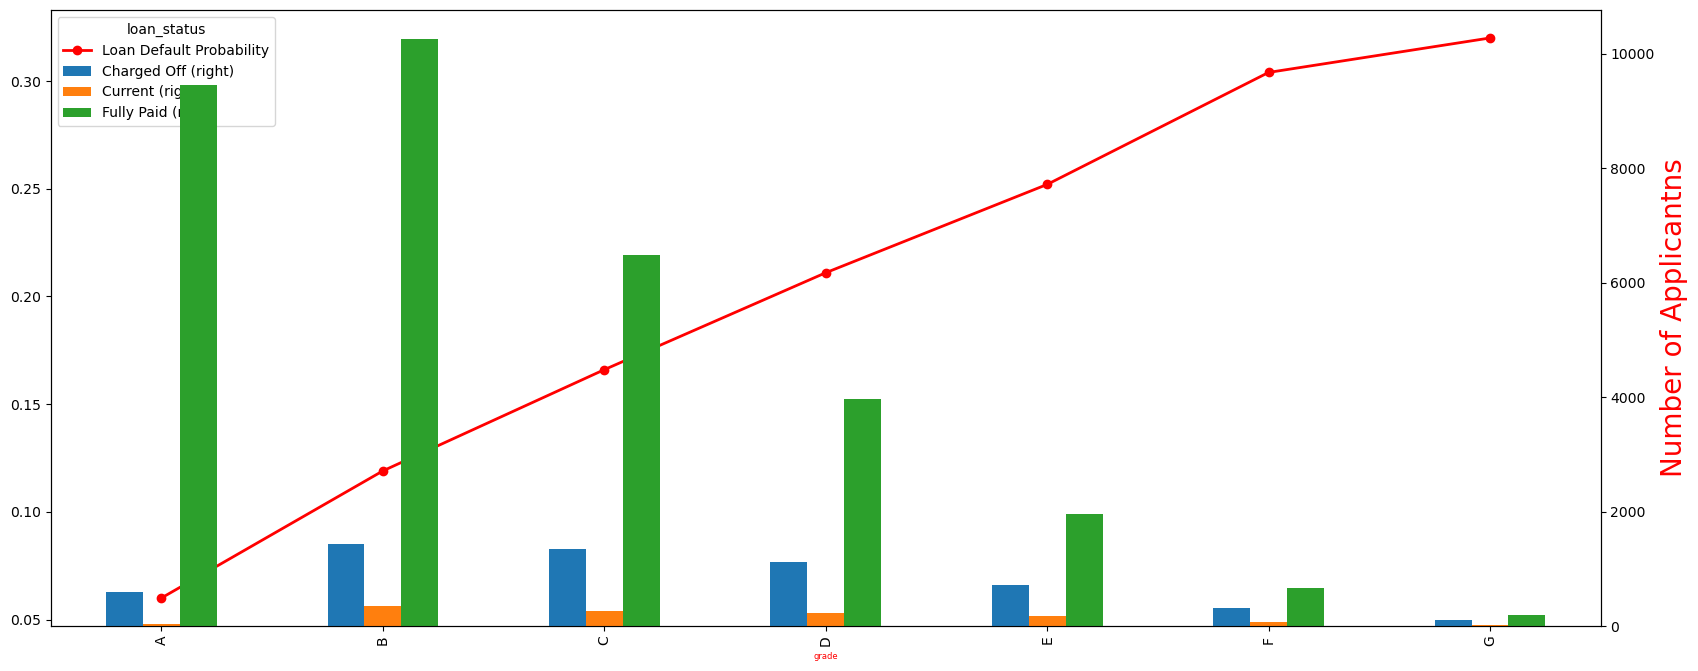

In [53]:
plt_bar_line_chart(app_df_reshaped, 'grade')

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
sub_grade,,,,,
A1,30,0,1109,1139,0.0260
A2,74,0,1434,1508,0.0490
A3,103,0,1707,1810,0.0570
A4,178,13,2695,2886,0.0620
A5,217,27,2498,2742,0.0790
B1,171,33,1626,1830,0.0930
B2,228,56,1773,2057,0.1110
B3,341,92,2484,2917,0.1170
B4,329,75,2108,2512,0.1310


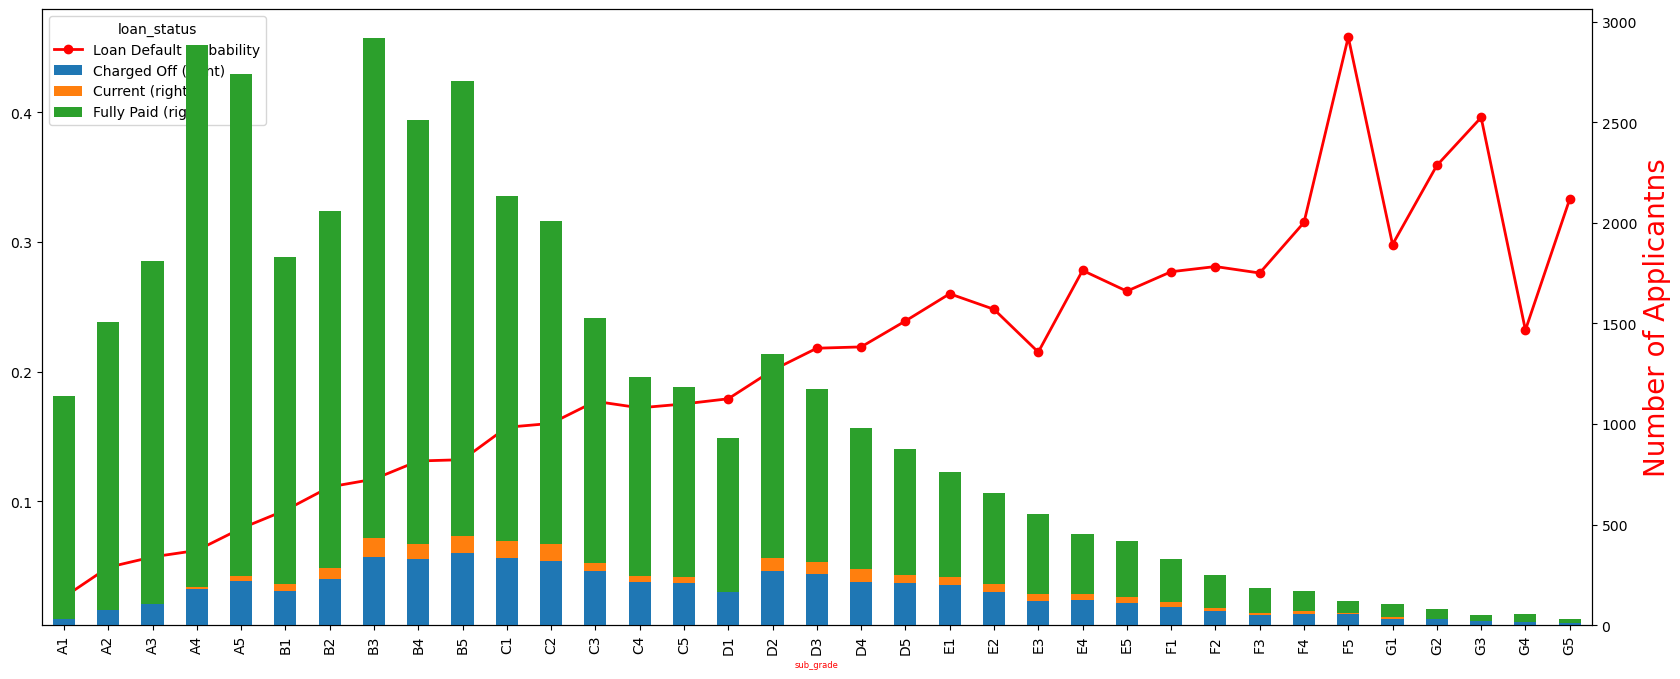

In [54]:
plt_bar_line_chart(app_df_reshaped, 'sub_grade', 'True')

#### Inference : From Grade A to G defaulter probability is increasing 

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
purpose,,,,,
car,160,50,1339,1549,0.1030
credit_card,542,103,4485,5130,0.1060
debt_consolidation,2767,586,15288,18641,0.1480
educational,56,0,269,325,0.1720
home_improvement,347,101,2528,2976,0.1170
house,59,14,308,381,0.1550
major_purchase,222,37,1928,2187,0.1020
medical,106,12,575,693,0.1530
moving,92,7,484,583,0.1580


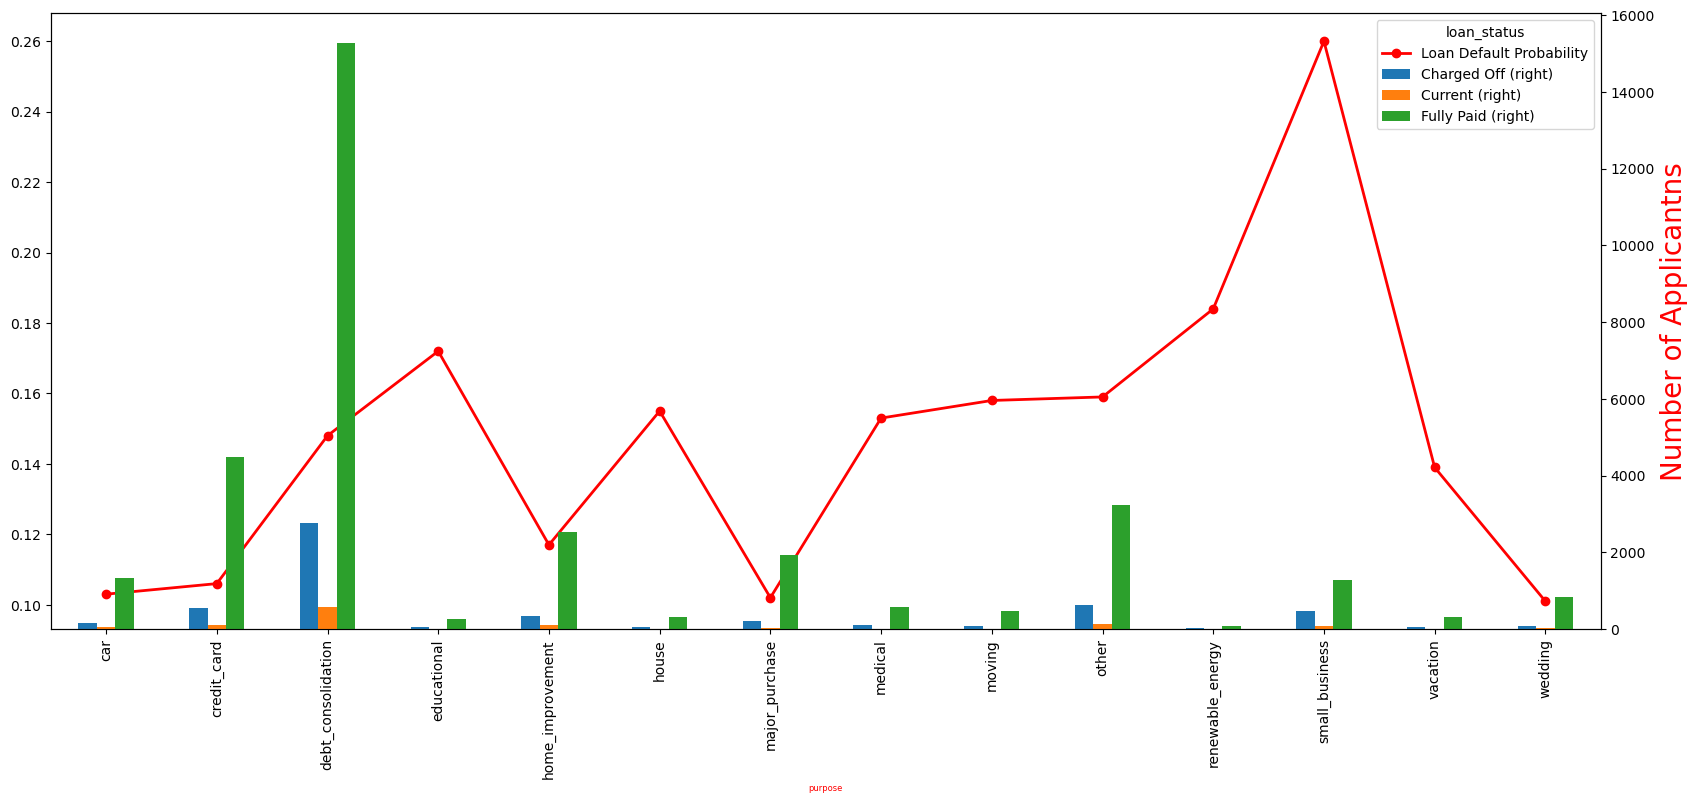

In [55]:
plt_bar_line_chart(app_df_reshaped, 'purpose')

#### Inference: Applicants who has taken loan for "small business" are likely to be defaulters. So bank should be cautious while approving loan for purpose of 'small business'

### Probability graph with continous variable does not give us significant view in the plot, so we need to create range for Loan Amount, Interest rate and Annual Income

In [56]:

## Create Bins for range for Loan Amount
buckets =[0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000 and above']
app_df_reshaped['loan_amnt_range'] = pd.cut(app_df_reshaped['loan_amnt'], buckets, labels=slot)

## Create Bins for range for Annual Income
buckets =[0, 25000, 50000, 75000, 100000, 1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '1000000 and above']
app_df_reshaped['annual_inc_range'] = pd.cut(app_df_reshaped['annual_inc'], buckets, labels=slot)


## Create Bins for range for Interest Rate
buckets =[0, 7.5, 10, 12.5, 15, 20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
app_df_reshaped['int_rate_rage'] = pd.cut(app_df_reshaped['int_rate'], buckets, labels=slot)

app_df_reshaped.head()





,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,frequency,issue_month,issue_year,loan_amt_inc_ratio,loan_amnt_range,annual_inc_range,int_rate_rage
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.6500,0,Jan-85,1,3,0,13648,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,May-16,0.0000,0,Dec,2011,0.2083,0-5000,0-25000,10-12.5
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,car,bike,GA,1.0000,0,Apr-99,5,3,0,1687,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,Sep-13,0.0000,0,Dec,2011,0.0833,0-5000,25000-50000,15 and above
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.7200,0,Nov-01,2,2,0,2956,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,May-16,0.0000,0,Dec,2011,0.1959,0-5000,0-25000,15 and above
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.0000,0,Feb-96,1,10,0,5598,21%,37,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,Apr-16,0.0000,0,Dec,2011,0.2033,5000-10000,25000-50000,12.5-15
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Source Verified,Dec-11,Current,other,Personal,OR,17.9400,0,Jan-96,0,15,0,27783,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,2475.9400,1037.3900,0.0000,0.0000,0.0000,May-16,67.7900,May-16,0.0000,0,Dec,2011,0.0375,0-5000,75000-100000,12.5-15


### Finding defaulter probability for Loan Amount

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
loan_amnt_range,,,,,
0-5000,1314,96,8158,9568,0.1370
5000-10000,1642,158,11160,12960,0.1270
10000-15000,1055,303,6628,7986,0.1320
15000-20000,751,242,3598,4591,0.1640
20000-25000,542,163,2294,2999,0.1810
25000 and above,323,178,1112,1613,0.2000


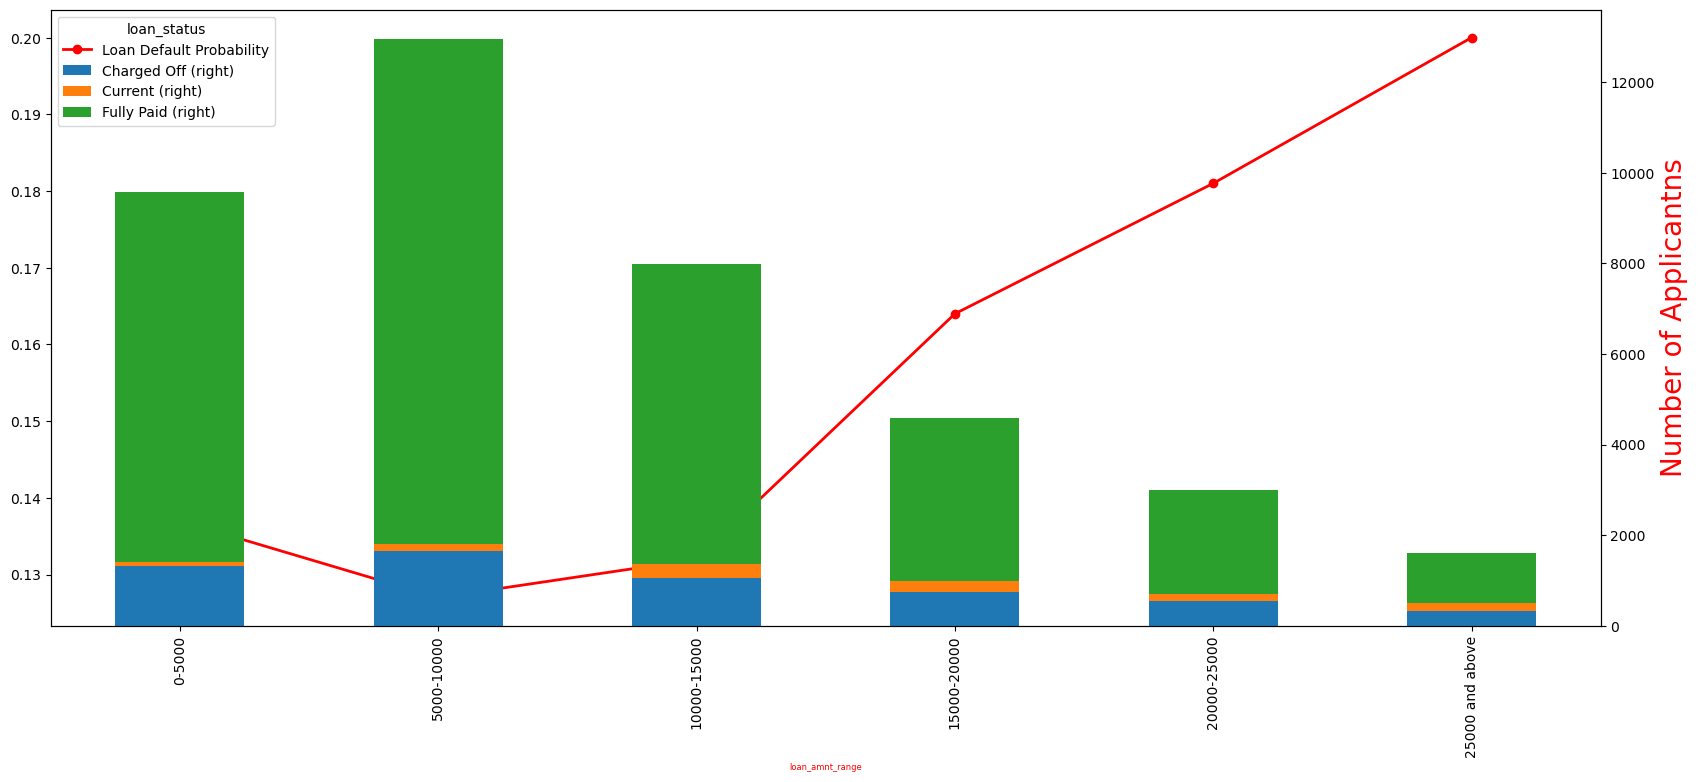

In [302]:
plt_bar_line_chart(app_df_reshaped, "loan_amnt_range", stacked=True)

#### Inference : From the graph, we can say that when loan amount is increasing defaulter rate is increasing so bank should pay attention for higher laon amount

### Finding defaulter probability for Interest Rate

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
int_rate_rage,,,,,
0-7.5,256,7,5114,5377,0.0480
7.5-10,574,70,6372,7016,0.0820
10-12.5,1232,270,8148,9650,0.1280
12.5-15,1475,259,7410,9144,0.1610
15 and above,1794,432,5432,7658,0.2340


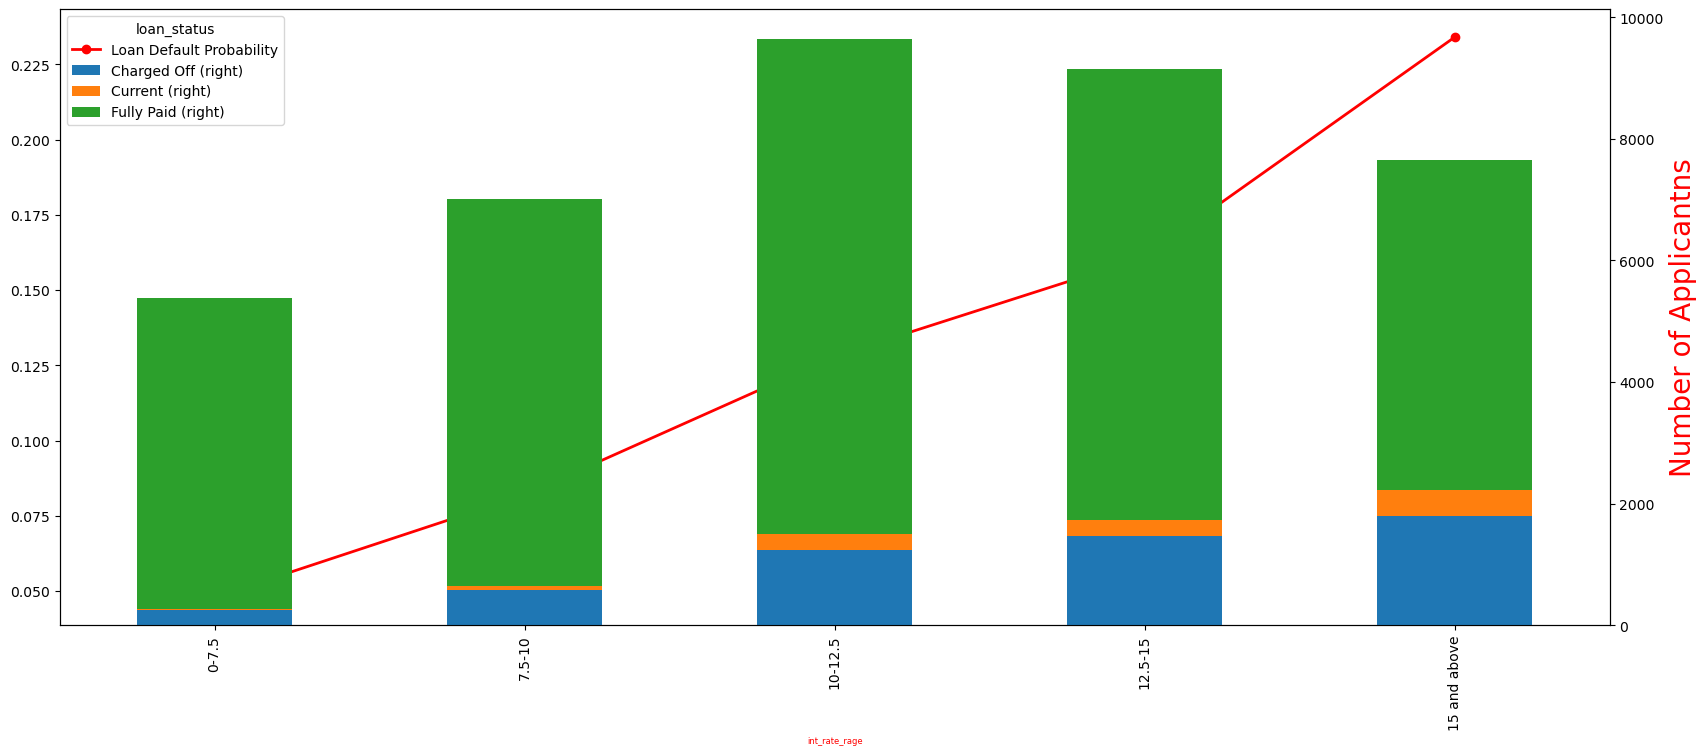

In [57]:
plt_bar_line_chart(app_df_reshaped, "int_rate_rage", stacked=True)

#### Inference : As the interest rate is increasing the defaulter rate, so banker should be cautious on this front.

### Finding defaulter probability for Annual Income

loan_status,Charged Off,Current,Fully Paid,All,Loan Default Probability
annual_inc_range,,,,,
0-25000,488,26,2062,2576,0.1890
25000-50000,2125,329,10714,13168,0.1610
50000-75000,1686,359,9982,12027,0.1400
75000-100000,736,220,5303,6259,0.1180
1000000 and above,591,206,4876,5673,0.1040


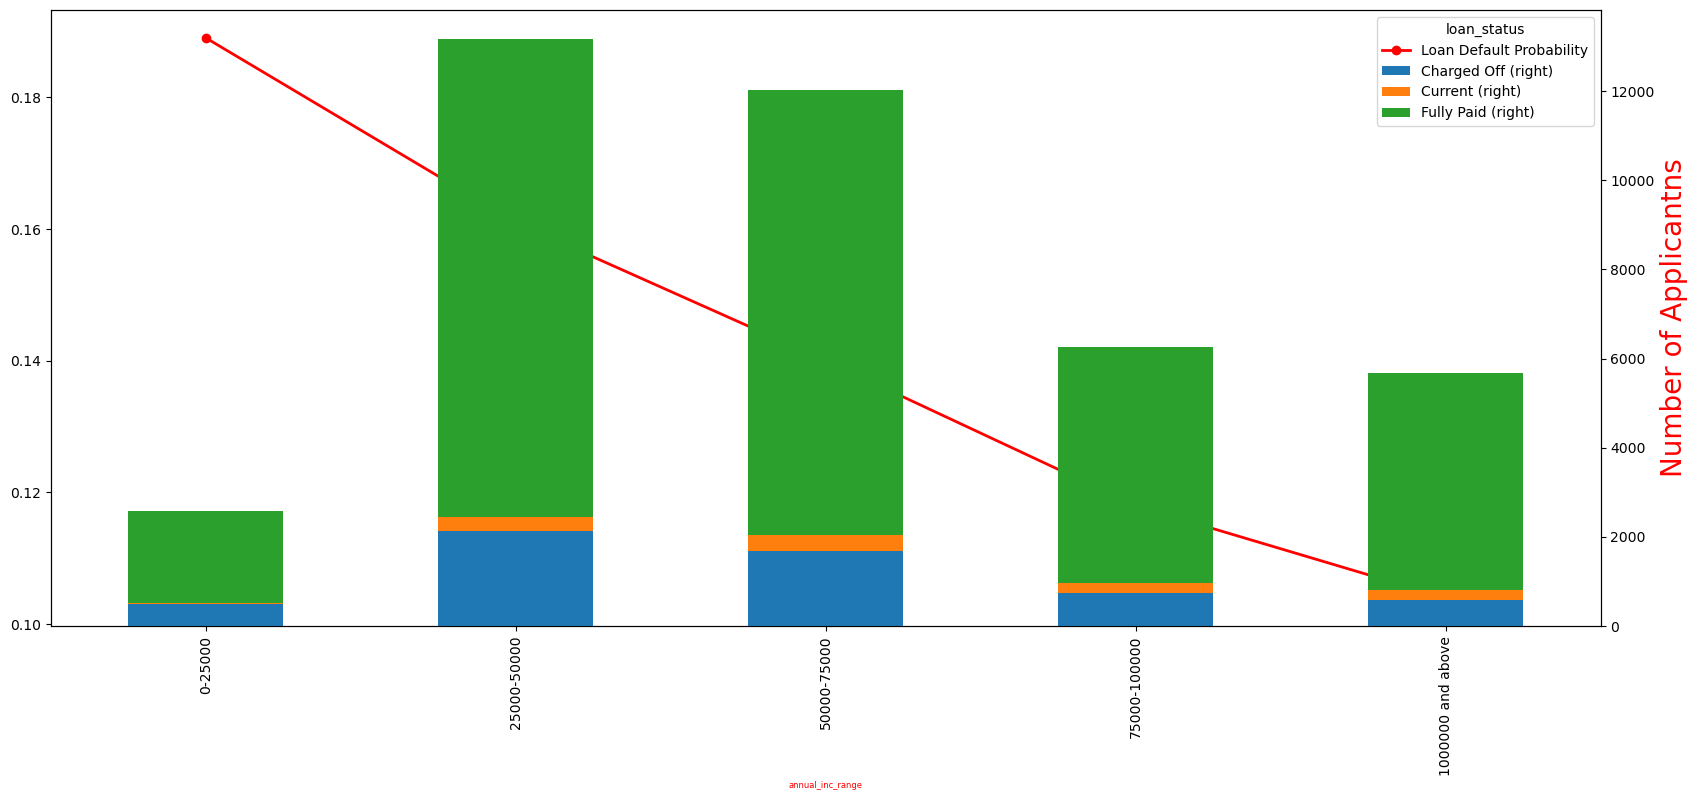

In [58]:
plt_bar_line_chart(app_df_reshaped, "annual_inc_range", stacked='True')

#### Inference : As annual income is decreasing loan defualter is increasing with highet of 19% approx (annual income range - 0-25000)